In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data set
dia = pd.read_csv("diabetes_split.csv")

In [3]:
dia.head()

Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         0          1   26       0       0   
1                0       1         1          1   26       1       1   
2                0       0         0          1   26       0       0   
3                0       1         1          1   28       1       0   
4                0       0         0          1   29       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             1       0  ...              1   
1                     0             0       1  ...              1   
2                     0             1       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        3         5        30         0    1    4          6   
1            0        3         0         0         0    1   12          6   
2            0        1         0        10         0    1   13          6   
3            0        3         0         3         0    1   11          6   
4            0        2         0         0         0    0    8          5   

   Income  
0       8  
1       8  
2       8  
3       8  
4       8  

[5 rows x 22 columns]

In [4]:
dia.shape

(70692, 22)

In [5]:
dia.describe()

Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000      0.000000      0.000000              0.000000   
50%       29.000000      0.000000      0.000000              0.000000   
75%       33.000000      1.000000      0.000000              0.000000   
max       98.000000      1.000000      1.000000              1.000000   

       PhysActivity        Fruits  ...  AnyHealthcare   NoDocbcCost  \
count  70692.000000  70692.000000  ...   70692.000000  70692.000000   
mean       0.703036      0.611795  ...       0.954960      0.093914   
std        0.456924      0.487345  ...       0.207394      0.291712   
min        0.000000      0.000000  ...       0.000000      0.000000   
25%        0.000000      0.000000  ...       1.000000      0.000000   
50%        1.000000      1.000000  ...       1.000000      0.000000   
75%        1.000000      1.000000  ...       1.000000      0.000000   
max        1.000000      1.000000  ...       1.000000      1.000000   

            GenHlth      MentHlth      PhysHlth      DiffWalk           Sex  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       2.837082      3.752037      5.810417      0.252730      0.456997   
std        1.113565      8.155627     10.062261      0.434581      0.498151   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        3.000000      0.000000      0.000000      0.000000      0.000000   
75%        4.000000      2.000000      6.000000      1.000000      1.000000   
max        5.000000     30.000000     30.000000      1.000000      1.000000   

                Age     Education        Income  
count  70692.000000  70692.000000  70692.000000  
mean       8.584055      4.920953      5.698311  
std        2.852153      1.029081      2.175196  
min        1.000000      1.000000      1.000000  
25%        7.000000      4.000000      4.000000  
50%        9.000000      5.000000      6.000000  
75%       11.000000      6.000000      8.000000  
max       13.000000      6.000000      8.000000  

[8 rows x 22 columns]

# Data Cleaning and Preprocessing:

In [6]:
dia.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Attribute Explanation:
Diabetes_binary:     
0 = no diabetes 1 = prediabetes 2 = diabetes     
HighBP:      
0 = no high BP 1 = high BP      
HighChol:    
0 = no high cholesterol 1 = high cholesterol     
CholCheck:     
0 = no cholesterol check in 5 years    
1 = yes cholesterol check in 5 years     
BMI:     
Body Mass Index     
Smoker:     
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes    
Stroke:    
(Ever told) you had a stroke. 0 = no 1 = yes   
HeartDiseaseorAttack:     
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes    
PhysActivity:    
physical activity in past 30 days - not including job 0 = no 1 = yes    
Fruits:    
Consume Fruit 1 or more times per day 0 = no 1 = yes     
Veggies:     
Consume Vegetables 1 or more times per day 0 = no 1 = yes     
HvyAlcoholConsump:     
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes     
AnyHealthcare:     
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes     
NoDocbcCost:     
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes    
GenHlth:     
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor     
MentHlth:    
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days     
PhysHlth:      
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days     
DiffWalk:     
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes    
Sex:    
0 = female 1 = male     
Age:      
13-level age category (1 = 18-24, 9 = 60-64, 13 = 80 or older)     
Education:     
1 = Never attended school or only kindergarten     
2 = Grades 1 through 8 (Elementary)      
3 = Grades 9 through 11 (Some high school)     
4 = Grade 12 or GED (High school graduate)      
5 = College 1 year to 3 years (Some college or technical school)       
6 = College 4 years or more (College graduate) )     
Income:     
1 = less than 10,000       
5 = less than 35,000      
8 = 75,000 or more

In [7]:
#renaming the column names for better understanding
dia = dia.rename(columns={"Diabetes_binary": "Diabetes", "HeartDiseaseorAttack": "HeartAttack", "PhysActivity": "Physical_Activity"})

In [8]:
#checking the % of missing value for further cleaning
nan_feature = [features for features in dia.columns if dia[features].isnull().sum()>1]

for feature in nan_feature:
  print(feature, np.round(dia[feature].isnull().mean(), 2), '% missing values')

In [9]:
dia.head(10)

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartAttack  \
0         0       1         0          1   26       0       0            0   
1         0       1         1          1   26       1       1            0   
2         0       0         0          1   26       0       0            0   
3         0       1         1          1   28       1       0            0   
4         0       0         0          1   29       1       0            0   
5         0       0         0          1   18       0       0            0   
6         0       0         1          1   26       1       0            0   
7         0       0         0          1   31       1       0            0   
8         0       0         0          1   32       0       0            0   
9         0       0         0          1   27       1       0            0   

   Physical_Activity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0                  1       0  ...              1            0        3   
1                  0       1  ...              1            0        3   
2                  1       1  ...              1            0        1   
3                  1       1  ...              1            0        3   
4                  1       1  ...              1            0        2   
5                  1       1  ...              0            0        2   
6                  1       1  ...              1            0        1   
7                  0       1  ...              1            0        4   
8                  1       1  ...              1            0        3   
9                  0       1  ...              1            0        3   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0         5        30         0    1    4          6       8  
1         0         0         0    1   12          6       8  
2         0        10         0    1   13          6       8  
3         0         3         0    1   11          6       8  
4         0         0         0    0    8          5       8  
5         7         0         0    0    1          4       7  
6         0         0         0    1   13          5       6  
7         0         0         0    1    6          4       3  
8         0         0         0    0    3          6       8  
9         0         6         0    1    6          4       4  

[10 rows x 22 columns]

No missing values in any of the attributes.

# Data Exploration:

Diabetes             1.000000
GenHlth              0.407612
HighBP               0.381516
BMI                  0.293373
HighChol             0.289213
Age                  0.278738
DiffWalk             0.272646
PhysHlth             0.213081
HeartAttack          0.211523
Stroke               0.125427
CholCheck            0.115382
MentHlth             0.087029
Smoker               0.085999
Sex                  0.044413
NoDocbcCost          0.040977
AnyHealthcare        0.023191
Fruits              -0.054077
Veggies             -0.079293
HvyAlcoholConsump   -0.094853
Physical_Activity   -0.158666
Education           -0.170481
Income              -0.224449
dtype: float64

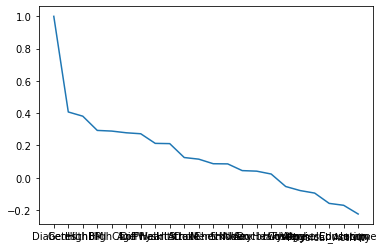

In [10]:
#exploring the correlation of attributes with the target variable ('Diabetes')
plt.plot(dia.corrwith(dia['Diabetes']).sort_values(ascending = False))
dia.corrwith(dia['Diabetes']).sort_values(ascending = False)


<AxesSubplot:xlabel='GenHlth', ylabel='HighBP'>

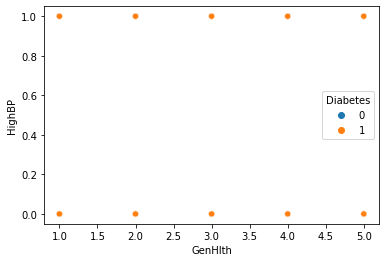

In [11]:
sns.scatterplot(x = dia['GenHlth'], y = dia['HighBP'], hue = dia['Diabetes'])

In [12]:
#pip install plotly

In [13]:
#importing necessary libraries for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [14]:
#interactive box-plot - 1
dia.pivot(columns='Diabetes', values='Age').iplot(kind='box', xTitle='Diabetes', yTitle='Patient Age', title='Patient Age range wrt each Diabetes')

In [15]:
#interactive box-plot - 2
dia.pivot(columns = 'Diabetes', values = 'Income').iplot(kind='box', xTitle='Diabetes', yTitle='Income Levels', title='Patient Income levels wrt Diabetes')

In [16]:
#interactive box-plot - 1
dia.pivot(columns='Diabetes', values='Education').iplot(kind='box', xTitle='Diabetes', yTitle='Patient Education', title='Patient Education range wrt each Diabetes')

<AxesSubplot:xlabel='GenHlth', ylabel='Count'>

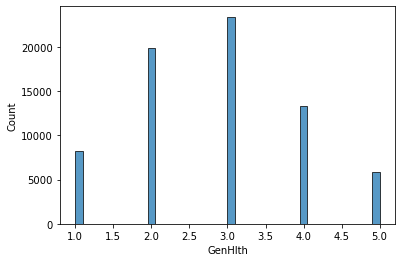

In [17]:
sns.histplot(dia['GenHlth'])

<AxesSubplot:xlabel='MentHlth', ylabel='Count'>

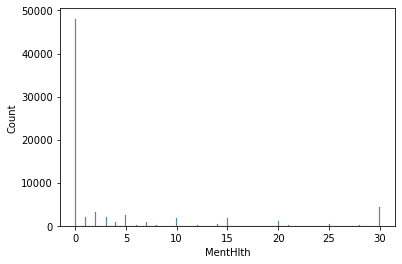

In [18]:
sns.histplot(dia['MentHlth'])

<AxesSubplot:xlabel='PhysHlth', ylabel='Count'>

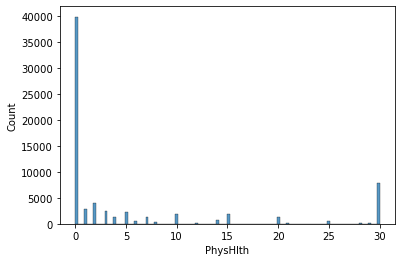

In [19]:
sns.histplot(dia['PhysHlth'])

In [20]:
#Dropping attributes that do not have a high correlation with the target variable (Diabetes)
dia.drop('NoDocbcCost', axis = 1, inplace = True)
dia.drop('AnyHealthcare', axis = 1, inplace = True)
dia.drop('Education', axis = 1, inplace = True)

In [21]:
dia.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartAttack', 'Physical_Activity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Income'],
      dtype='object')

In [22]:
for col in dia:
    print (col, dia[col].unique())

Diabetes [0 1]
HighBP [1 0]
HighChol [0 1]
CholCheck [1 0]
BMI [26 28 29 18 31 32 27 24 21 58 30 20 22 38 40 25 36 47 19 37 41 23 34 35
 42 17 33 44 15 52 69 56 45 39 92 53 98 50 46 79 48 16 63 72 54 49 68 43
 84 73 76 55 51 75 57 60 12 77 82 67 71 61 14 81 59 86 13 87 65 95 89 62
 64 66 85 70 83 80 78 74]
Smoker [0 1]
Stroke [0 1]
HeartAttack [0 1]
Physical_Activity [1 0]
Fruits [0 1]
Veggies [1 0]
HvyAlcoholConsump [0 1]
GenHlth [3 1 2 4 5]
MentHlth [ 5  0  7  3  4  2 30 20  1 15 10 25 14 28  6 29 26 12 16 22 13  8  9 21
 18 17 27 24 23 11 19]
PhysHlth [30  0 10  3  6  4 15  1  2 14  7 25 21 20  5  8 22 23 29 12 18 28 26 24
 27 11 13 16 17  9 19]
DiffWalk [0 1]
Sex [1 0]
Age [ 4 12 13 11  8  1  6  3  7 10  9  5  2]
Income [8 7 6 3 4 1 5 2]


In [23]:
for col in dia:
    print(col, dia[col].dtypes)

Diabetes int64
HighBP int64
HighChol int64
CholCheck int64
BMI int64
Smoker int64
Stroke int64
HeartAttack int64
Physical_Activity int64
Fruits int64
Veggies int64
HvyAlcoholConsump int64
GenHlth int64
MentHlth int64
PhysHlth int64
DiffWalk int64
Sex int64
Age int64
Income int64


# Feature Engineering

In [24]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
dia["NewBMI"] = NewBMI
dia.loc[dia["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
dia.loc[(dia["BMI"] > 18.5) & (dia["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
dia.loc[(dia["BMI"] > 24.9) & (dia["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
dia.loc[(dia["BMI"] > 29.9) & (dia["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
dia.loc[(dia["BMI"] > 34.9) & (dia["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
dia.loc[dia["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [25]:
dia.head(10)

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartAttack  \
0         0       1         0          1   26       0       0            0   
1         0       1         1          1   26       1       1            0   
2         0       0         0          1   26       0       0            0   
3         0       1         1          1   28       1       0            0   
4         0       0         0          1   29       1       0            0   
5         0       0         0          1   18       0       0            0   
6         0       0         1          1   26       1       0            0   
7         0       0         0          1   31       1       0            0   
8         0       0         0          1   32       0       0            0   
9         0       0         0          1   27       1       0            0   

   Physical_Activity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0                  1       0        1                  0        3         5   
1                  0       1        0                  0        3         0   
2                  1       1        1                  0        1         0   
3                  1       1        1                  0        3         0   
4                  1       1        1                  0        2         0   
5                  1       1        1                  0        2         7   
6                  1       1        1                  1        1         0   
7                  0       1        1                  0        4         0   
8                  1       1        1                  0        3         0   
9                  0       1        1                  0        3         0   

   PhysHlth  DiffWalk  Sex  Age  Income       NewBMI  
0        30         0    1    4       8   Overweight  
1         0         0    1   12       8   Overweight  
2        10         0    1   13       8   Overweight  
3         3         0    1   11       8   Overweight  
4         0         0    0    8       8   Overweight  
5         0         0    0    1       7  Underweight  
6         0         0    1   13       6   Overweight  
7         0         0    1    6       3    Obesity 1  
8         0         0    0    3       8    Obesity 1  
9         6         0    1    6       4   Overweight

In [26]:
#According to general health, some ranges were determined and categorical variables were assigned.
NewGenHlth = pd.Series(["Excellent" , "Very Good" , "Good", "Fair" , "Poor"], dtype = "category")
dia["NewGenHlth"] = NewGenHlth
dia.loc[dia["GenHlth"] == 1, "NewGenHlth"] = NewGenHlth[0]
dia.loc[dia["GenHlth"] == 2, "NewGenHlth"] = NewGenHlth[1]
dia.loc[dia["GenHlth"] == 3, "NewGenHlth"] = NewGenHlth[2]
dia.loc[dia["GenHlth"] == 4, "NewGenHlth"] = NewGenHlth[3]
dia.loc[dia["GenHlth"] == 5, "NewGenHlth"] = NewGenHlth[4]

In [27]:
dia

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         0          1   26       0       0   
1             0       1         1          1   26       1       1   
2             0       0         0          1   26       0       0   
3             0       1         1          1   28       1       0   
4             0       0         0          1   29       1       0   
...         ...     ...       ...        ...  ...     ...     ...   
70687         1       0         1          1   37       0       0   
70688         1       0         1          1   29       1       0   
70689         1       1         1          1   25       0       0   
70690         1       1         1          1   18       0       0   
70691         1       1         1          1   25       0       0   

       HeartAttack  Physical_Activity  Fruits  ...  HvyAlcoholConsump  \
0                0                  1       0  ...                  0   
1                0                  0       1  ...                  0   
2                0                  1       1  ...                  0   
3                0                  1       1  ...                  0   
4                0                  1       1  ...                  0   
...            ...                ...     ...  ...                ...   
70687            0                  0       0  ...                  0   
70688            1                  0       1  ...                  0   
70689            1                  0       1  ...                  0   
70690            0                  0       0  ...                  0   
70691            1                  1       1  ...                  0   

       GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Income       NewBMI  \
0            3         5        30         0    1    4       8   Overweight   
1            3         0         0         0    1   12       8   Overweight   
2            1         0        10         0    1   13       8   Overweight   
3            3         0         3         0    1   11       8   Overweight   
4            2         0         0         0    0    8       8   Overweight   
...        ...       ...       ...       ...  ...  ...     ...          ...   
70687        4         0         0         0    0    6       1    Obesity 2   
70688        2         0         0         1    1   10       6   Overweight   
70689        5        15         0         1    0   13       4   Overweight   
70690        4         0         0         1    0   11       4  Underweight   
70691        2         0         0         0    0    9       2   Overweight   

      NewGenHlth  
0           Good  
1           Good  
2      Excellent  
3           Good  
4      Very Good  
...          ...  
70687       Fair  
70688  Very Good  
70689       Poor  
70690       Fair  
70691  Very Good  

[70692 rows x 21 columns]

In [28]:
#According to mental health, some ranges were determined and categorical variables were assigned.
NewMentHlth = pd.Series(["Good" , "OK", "Poor"], dtype = "category")
dia["NewMentHlth"] = NewMentHlth
dia.loc[dia["MentHlth"] < 10, "NewMentHlth"] = NewMentHlth[0]
dia.loc[(dia["MentHlth"] >= 10) & (dia["BMI"] <20), "NewMentHlth"] = NewMentHlth[1]
dia.loc[dia["MentHlth"] >=20 ,"NewMentHlth"] = NewMentHlth[2]

In [29]:
dia.head(50)

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartAttack  \
0          0       1         0          1   26       0       0            0   
1          0       1         1          1   26       1       1            0   
2          0       0         0          1   26       0       0            0   
3          0       1         1          1   28       1       0            0   
4          0       0         0          1   29       1       0            0   
5          0       0         0          1   18       0       0            0   
6          0       0         1          1   26       1       0            0   
7          0       0         0          1   31       1       0            0   
8          0       0         0          1   32       0       0            0   
9          0       0         0          1   27       1       0            0   
10         0       1         1          1   24       1       0            1   
11         0       0         0          1   21       0       0            0   
12         0       1         1          1   27       0       0            0   
13         0       1         0          1   58       0       0            0   
14         0       0         1          1   29       1       0            0   
15         0       0         0          1   18       1       0            0   
16         0       0         0          1   30       0       0            0   
17         0       0         0          1   30       1       0            0   
18         0       0         0          1   20       0       0            0   
19         0       1         0          1   26       0       0            0   
20         0       0         0          1   22       0       0            0   
21         0       1         0          1   29       1       0            0   
22         0       0         0          1   22       0       0            0   
23         0       0         0          1   30       0       0            0   
24         0       0         1          1   27       0       0            0   
25         0       0         1          1   28       0       0            0   
26         0       1         0          1   20       1       0            0   
27         0       1         1          1   32       0       0            0   
28         0       0         0          1   38       0       0            0   
29         0       0         1          1   40       1       0            0   
30         0       1         1          1   24       1       0            0   
31         0       0         0          1   24       1       0            0   
32         0       0         0          1   20       0       0            0   
33         0       0         0          1   20       0       0            0   
34         0       1         1          1   29       1       0            1   
35         0       0         1          1   24       0       0            0   
36         0       0         0          1   25       0       0            0   
37         0       0         0          1   36       1       0            0   
38         0       0         1          1   31       1       0            0   
39         0       0         1          1   27       1       0            0   
40         0       0         0          1   26       0       0            0   
41         0       0         1          1   27       0       0            0   
42         0       1         1          1   47       1       0            0   
43         0       1         0          1   38       1       0            0   
44         0       1         1          1   28       0       0            0   
45         0       0         0          1   20       1       0            0   
46         0       0         0          1   19       1       0            0   
47         0       0         1          1   25       0       0            0   
48         0       0         0          1   26       0       0            0   
49         0       1         0          1   22       0

In [30]:
#According to physical health, some ranges were determined and categorical variables were assigned.
NewPhysHlth = pd.Series(["Good" , "OK", "Poor"], dtype = "category")
dia["NewPhysHlth"] = NewPhysHlth
dia.loc[dia["PhysHlth"] < 10, "NewPhysHlth"] = NewMentHlth[0]
dia.loc[(dia["PhysHlth"] >= 10) & (dia["PhysHlth"] <20), "NewMentHlth"] = NewMentHlth[1]
dia.loc[dia["PhysHlth"] >=20 ,"PhysHlth"] = NewMentHlth[2]

In [31]:
dia.head(5)

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartAttack  \
0         0       1         0          1   26       0       0            0   
1         0       1         1          1   26       1       1            0   
2         0       0         0          1   26       0       0            0   
3         0       1         1          1   28       1       0            0   
4         0       0         0          1   29       1       0            0   

   Physical_Activity  Fruits  ...  MentHlth  PhysHlth  DiffWalk  Sex Age  \
0                  1       0  ...         5      Poor         0    1   4   
1                  0       1  ...         0         0         0    1  12   
2                  1       1  ...         0        10         0    1  13   
3                  1       1  ...         0         3         0    1  11   
4                  1       1  ...         0         0         0    0   8   

   Income      NewBMI  NewGenHlth  NewMentHlth NewPhysHlth  
0       8  Overweight        Good         Good        Good  
1       8  Overweight        Good         Good        Good  
2       8  Overweight   Excellent           OK        Poor  
3       8  Overweight        Good         Good        Good  
4       8  Overweight   Very Good         Good        Good  

[5 rows x 23 columns]

In [32]:
#According to age, some ranges were determined and categorical variables were assigned.
NewAge = pd.Series(["18-47" , "48-63", ">=64"], dtype = "category")
dia["NewAge"] = NewAge
dia.loc[(dia["Age"] >= 1)  & (dia["Age"] < 7) , "NewAge"] = NewAge[0]
dia.loc[(dia["Age"] >= 7) & (dia["Age"] <= 12), "NewAge"] = NewAge[1]
dia.loc[dia["Age"] >12 ,"NewAge"] = NewAge[2]

In [33]:
dia

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         0          1   26       0       0   
1             0       1         1          1   26       1       1   
2             0       0         0          1   26       0       0   
3             0       1         1          1   28       1       0   
4             0       0         0          1   29       1       0   
...         ...     ...       ...        ...  ...     ...     ...   
70687         1       0         1          1   37       0       0   
70688         1       0         1          1   29       1       0   
70689         1       1         1          1   25       0       0   
70690         1       1         1          1   18       0       0   
70691         1       1         1          1   25       0       0   

       HeartAttack  Physical_Activity  Fruits  ...  PhysHlth  DiffWalk  Sex  \
0                0                  1       0  ...      Poor         0    1   
1                0                  0       1  ...         0         0    1   
2                0                  1       1  ...        10         0    1   
3                0                  1       1  ...         3         0    1   
4                0                  1       1  ...         0         0    0   
...            ...                ...     ...  ...       ...       ...  ...   
70687            0                  0       0  ...         0         0    0   
70688            1                  0       1  ...         0         1    1   
70689            1                  0       1  ...         0         1    0   
70690            0                  0       0  ...         0         1    0   
70691            1                  1       1  ...         0         0    0   

       Age Income       NewBMI  NewGenHlth  NewMentHlth  NewPhysHlth NewAge  
0        4      8   Overweight        Good         Good         Good  18-47  
1       12      8   Overweight        Good         Good         Good  48-63  
2       13      8   Overweight   Excellent           OK         Poor   >=64  
3       11      8   Overweight        Good         Good         Good  48-63  
4        8      8   Overweight   Very Good         Good         Good  48-63  
...    ...    ...          ...         ...          ...          ...    ...  
70687    6      1    Obesity 2        Fair         Good         Good  18-47  
70688   10      6   Overweight   Very Good         Good         Good  48-63  
70689   13      4   Overweight        Poor          NaN         Good   >=64  
70690   11      4  Underweight        Fair         Good         Good  48-63  
70691    9      2   Overweight   Very Good         Good         Good  48-63  

[70692 rows x 24 columns]

In [34]:
dia.head(10)

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartAttack  \
0         0       1         0          1   26       0       0            0   
1         0       1         1          1   26       1       1            0   
2         0       0         0          1   26       0       0            0   
3         0       1         1          1   28       1       0            0   
4         0       0         0          1   29       1       0            0   
5         0       0         0          1   18       0       0            0   
6         0       0         1          1   26       1       0            0   
7         0       0         0          1   31       1       0            0   
8         0       0         0          1   32       0       0            0   
9         0       0         0          1   27       1       0            0   

   Physical_Activity  Fruits  ...  PhysHlth  DiffWalk  Sex  Age Income  \
0                  1       0  ...      Poor         0    1    4      8   
1                  0       1  ...         0         0    1   12      8   
2                  1       1  ...        10         0    1   13      8   
3                  1       1  ...         3         0    1   11      8   
4                  1       1  ...         0         0    0    8      8   
5                  1       1  ...         0         0    0    1      7   
6                  1       1  ...         0         0    1   13      6   
7                  0       1  ...         0         0    1    6      3   
8                  1       1  ...         0         0    0    3      8   
9                  0       1  ...         6         0    1    6      4   

        NewBMI  NewGenHlth  NewMentHlth  NewPhysHlth NewAge  
0   Overweight        Good         Good         Good  18-47  
1   Overweight        Good         Good         Good  48-63  
2   Overweight   Excellent           OK         Poor   >=64  
3   Overweight        Good         Good         Good  48-63  
4   Overweight   Very Good         Good         Good  48-63  
5  Underweight   Very Good         Good         Good  18-47  
6   Overweight   Excellent         Good         Good   >=64  
7    Obesity 1        Fair         Good         Good  18-47  
8    Obesity 1        Good         Good         Good  18-47  
9   Overweight        Good         Good         Good  18-47  

[10 rows x 24 columns]

In [35]:
#According to income, some ranges were determined and categorical variables were assigned.
NewIncome = pd.Series(["Lower-Income" , "Middle-Income", "Upper-Income"], dtype = "category")
dia["NewIncome"] = NewIncome
dia.loc[(dia["Income"] >= 1)  & (dia["Income"] < 5) , "NewIncome"] = NewIncome[0]
dia.loc[(dia["Income"] >= 5) & (dia["Income"] <= 7), "NewIncome"] = NewIncome[1]
dia.loc[dia["Income"] >= 8 ,"NewIncome"] = NewIncome[2]

In [36]:
dia.head(10)

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartAttack  \
0         0       1         0          1   26       0       0            0   
1         0       1         1          1   26       1       1            0   
2         0       0         0          1   26       0       0            0   
3         0       1         1          1   28       1       0            0   
4         0       0         0          1   29       1       0            0   
5         0       0         0          1   18       0       0            0   
6         0       0         1          1   26       1       0            0   
7         0       0         0          1   31       1       0            0   
8         0       0         0          1   32       0       0            0   
9         0       0         0          1   27       1       0            0   

   Physical_Activity  Fruits  ...  DiffWalk  Sex  Age  Income       NewBMI  \
0                  1       0  ...         0    1    4       8   Overweight   
1                  0       1  ...         0    1   12       8   Overweight   
2                  1       1  ...         0    1   13       8   Overweight   
3                  1       1  ...         0    1   11       8   Overweight   
4                  1       1  ...         0    0    8       8   Overweight   
5                  1       1  ...         0    0    1       7  Underweight   
6                  1       1  ...         0    1   13       6   Overweight   
7                  0       1  ...         0    1    6       3    Obesity 1   
8                  1       1  ...         0    0    3       8    Obesity 1   
9                  0       1  ...         0    1    6       4   Overweight   

   NewGenHlth  NewMentHlth  NewPhysHlth  NewAge      NewIncome  
0        Good         Good         Good   18-47   Upper-Income  
1        Good         Good         Good   48-63   Upper-Income  
2   Excellent           OK         Poor    >=64   Upper-Income  
3        Good         Good         Good   48-63   Upper-Income  
4   Very Good         Good         Good   48-63   Upper-Income  
5   Very Good         Good         Good   18-47  Middle-Income  
6   Excellent         Good         Good    >=64  Middle-Income  
7        Fair         Good         Good   18-47   Lower-Income  
8        Good         Good         Good   18-47   Upper-Income  
9        Good         Good         Good   18-47   Lower-Income  

[10 rows x 25 columns]

# One Hot Encoding

In [37]:

dia = pd.get_dummies(dia, columns =["NewBMI","NewGenHlth", "NewMentHlth", "NewPhysHlth", "NewAge", "NewIncome"], drop_first = True)

In [38]:
dia.head(2000)

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartAttack  \
0            0       1         0          1   26       0       0            0   
1            0       1         1          1   26       1       1            0   
2            0       0         0          1   26       0       0            0   
3            0       1         1          1   28       1       0            0   
4            0       0         0          1   29       1       0            0   
...        ...     ...       ...        ...  ...     ...     ...          ...   
1995         0       0         0          1   27       1       0            0   
1996         0       0         1          1   26       1       0            0   
1997         0       0         0          1   31       1       0            0   
1998         0       0         1          1   37       1       0            0   
1999         0       0         0          1   30       0       0            0   

      Physical_Activity  Fruits  ...  NewGenHlth_Poor  NewGenHlth_Very Good  \
0                     1       0  ...                0                     0   
1                     0       1  ...                0                     0   
2                     1       1  ...                0                     0   
3                     1       1  ...                0                     0   
4                     1       1  ...                0                     1   
...                 ...     ...  ...              ...                   ...   
1995                  0       0  ...                0                     1   
1996                  0       0  ...                0                     0   
1997                  1       0  ...                0                     0   
1998                  1       0  ...                0                     1   
1999                  0       1  ...                0                     0   

      NewMentHlth_OK  NewMentHlth_Poor NewPhysHlth_OK  NewPhysHlth_Poor  \
0                  0                 0              0                 0   
1                  0                 0              0                 0   
2                  1                 0              0                 1   
3                  0                 0              0                 0   
4                  0                 0              0                 0   
...              ...               ...            ...               ...   
1995               0                 0              0                 0   
1996               0                 0              0                 0   
1997               0                 0              0                 0   
1998               0                 0              0                 0   
1999               0                 0              0                 0   

      NewAge_48-63  NewAge_>=64  NewIncome_Middle-Income  \
0                0            0                        0   
1                1            0                        0   
2                0            1                        0   
3                1            0                        0   
4                1            0                        0   
...            ...          ...                      ...   
1995             1            0                        1   
1996             1            0                        1   
1997             1            0                        1   
1998             1            0                        1   
1999             1            0                        0   

      NewIncome_Upper-Income  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  
...                      ...  
1995                       0  
1996                       0  
1997                       0  
1998                       0  
1999                       0  

[2000 rows x 36 columns]

In [41]:
dia.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartAttack', 'Physical_Activity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Income', 'NewBMI_Obesity 1', 'NewBMI_Obesity 2',
       'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight',
       'NewGenHlth_Fair', 'NewGenHlth_Good', 'NewGenHlth_Poor',
       'NewGenHlth_Very Good', 'NewMentHlth_OK', 'NewMentHlth_Poor',
       'NewPhysHlth_OK', 'NewPhysHlth_Poor', 'NewAge_48-63', 'NewAge_>=64',
       'NewIncome_Middle-Income', 'NewIncome_Upper-Income'],
      dtype='object')

In [42]:
dia = dia.drop(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth','Age','Income'], axis = 1)

In [43]:
dia

Diabetes  HighBP  HighChol  CholCheck  Smoker  Stroke  HeartAttack  \
0             0       1         0          1       0       0            0   
1             0       1         1          1       1       1            0   
2             0       0         0          1       0       0            0   
3             0       1         1          1       1       0            0   
4             0       0         0          1       1       0            0   
...         ...     ...       ...        ...     ...     ...          ...   
70687         1       0         1          1       0       0            0   
70688         1       0         1          1       1       0            1   
70689         1       1         1          1       0       0            1   
70690         1       1         1          1       0       0            0   
70691         1       1         1          1       0       0            1   

       Physical_Activity  Fruits  Veggies  ...  NewGenHlth_Poor  \
0                      1       0        1  ...                0   
1                      0       1        0  ...                0   
2                      1       1        1  ...                0   
3                      1       1        1  ...                0   
4                      1       1        1  ...                0   
...                  ...     ...      ...  ...              ...   
70687                  0       0        1  ...                0   
70688                  0       1        1  ...                0   
70689                  0       1        0  ...                1   
70690                  0       0        0  ...                0   
70691                  1       1        0  ...                0   

       NewGenHlth_Very Good  NewMentHlth_OK  NewMentHlth_Poor  NewPhysHlth_OK  \
0                         0               0                 0               0   
1                         0               0                 0               0   
2                         0               1                 0               0   
3                         0               0                 0               0   
4                         1               0                 0               0   
...                     ...             ...               ...             ...   
70687                     0               0                 0               0   
70688                     1               0                 0               0   
70689                     0               0                 0               0   
70690                     0               0                 0               0   
70691                     1               0                 0               0   

       NewPhysHlth_Poor  NewAge_48-63  NewAge_>=64  NewIncome_Middle-Income  \
0                     0             0            0                        0   
1                     0             1            0                        0   
2                     1             0            1                        0   
3                     0             1            0                        0   
4                     0             1            0                        0   
...                 ...           ...          ...                      ...   
70687                 0             0            0                        0   
70688                 0             1            0                        1   
70689                 0             0            1                        0   
70690                 0             1            0                        0   
70691                 0             1            0                        0   

       NewIncome_Upper-Income  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
...                       ...  
70687                       0  
70688                       0  
70689                       0  
70690                       0  
706

# Splitting data set:

In [44]:
#splitting the data set into features and target variable sets
dia_features = dia.loc[:, dia.columns != 'Diabetes']
dia_target = dia['Diabetes']

In [45]:
#scaling the variables 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dia_features, dia_target, test_size = 0.2, random_state = 0, shuffle = True)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Data Modelling:

## Logistic Modelling:

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(x_train, y_train)

lr_y_pred = lr.predict(x_test)

lr_train_acc = accuracy_score(y_train, lr.predict(x_train))
lr_test_acc = accuracy_score(y_test, lr_y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.7474935016709989
Test Accuracy of Logistic Regression Model is 0.7478605276186435


In [48]:
lr_confusion_matrix = confusion_matrix(y_test, lr_y_pred)
print(lr_confusion_matrix)

[[5001 1931]
 [1634 5573]]


In [49]:
#displaying the actual and predicted 'Diabetes' values
Logistic_results = pd.DataFrame({'Actual (Diabetes)': y_test, 'Predicted (Diabetes)': lr_y_pred})
print(Logistic_results)

       Actual (Diabetes)  Predicted (Diabetes)
34746                  0                     1
11085                  0                     0
51382                  1                     0
53894                  1                     1
31333                  0                     1
...                  ...                   ...
58953                  1                     0
5823                   0                     0
57923                  1                     1
15560                  0                     0
49908                  1                     0

[14139 rows x 2 columns]


<AxesSubplot:>

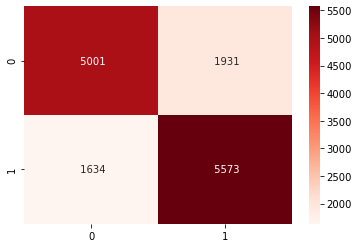

In [64]:
sns.heatmap(lr_confusion_matrix, annot = True, fmt=' ', cmap='Reds')

## KNN Classification

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

knn.fit(x_train, y_train)

knn_y_pred = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, knn.predict(x_train))
knn_test_acc = accuracy_score(y_test, knn_y_pred)

print(f"Training Accuracy of KNN Classification Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Classification Model is {knn_test_acc}")

Training Accuracy of KNN Classification Model is 0.786960903930826
Test Accuracy of KNN Classification Model is 0.7114364523657968


In [65]:
knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred)
print(knn_confusion_matrix)

[[4737 2195]
 [1885 5322]]


In [66]:
#displaying the actual and predicted 'Diabetes' values
knn_results = pd.DataFrame({'Actual (Diabetes)': y_test, 'Predicted (Diabetes)': knn_y_pred})
print(knn_results)

       Actual (Diabetes)  Predicted (Diabetes)
34746                  0                     1
11085                  0                     0
51382                  1                     0
53894                  1                     1
31333                  0                     1
...                  ...                   ...
58953                  1                     0
5823                   0                     0
57923                  1                     1
15560                  0                     0
49908                  1                     0

[14139 rows x 2 columns]


<AxesSubplot:>

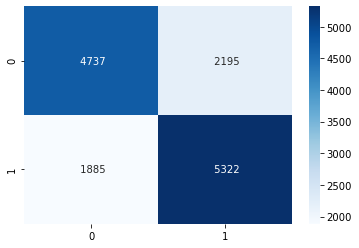

In [67]:
sns.heatmap(knn_confusion_matrix, annot = True, fmt = ' ', cmap = 'Blues')

## SVM Modelling

In [68]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

svc_y_pred = svc.predict(x_test)

svc_train_acc = accuracy_score(y_train, svc.predict(x_train))
svc_test_acc = accuracy_score(y_test, svc_y_pred)

print(f"Training Accuracy of SVM Model is {svc_train_acc}")
print(f"Test Accuracy of SVM Model is {svc_test_acc}")

Training Accuracy of SVM Model is 0.7478294697009884
Test Accuracy of SVM Model is 0.7484263384963576


In [69]:
svc_confusion_matrix = confusion_matrix(y_test, svc_y_pred)
print(svc_confusion_matrix)

[[4902 2030]
 [1527 5680]]


In [70]:
#displaying the actual and predicted 'Diabetes' values
svm_results = pd.DataFrame({'Actual (Diabetes)': y_test, 'Predicted (Diabetes)': svc_y_pred})
print(svm_results)

       Actual (Diabetes)  Predicted (Diabetes)
34746                  0                     1
11085                  0                     0
51382                  1                     0
53894                  1                     1
31333                  0                     1
...                  ...                   ...
58953                  1                     0
5823                   0                     0
57923                  1                     1
15560                  0                     1
49908                  1                     0

[14139 rows x 2 columns]


<AxesSubplot:>

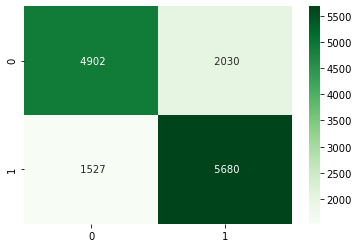

In [73]:
sns.heatmap(svc_confusion_matrix, annot = True, fmt = ' ', cmap = 'Greens')

## Kernel SVM Modelling

In [74]:
from sklearn.svm import SVC
svck = SVC(kernel = 'rbf', random_state = 0)
svck.fit(x_train, y_train)


svck_y_pred = svck.predict(x_test)

svck_train_acc = accuracy_score(y_train, svck.predict(x_train))
svck_test_acc = accuracy_score(y_test, svck_y_pred)

print(f"Training Accuracy of Kernel SVM Model is {svck_train_acc}")
print(f"Test Accuracy of Kernel SVM Model is {svck_test_acc}")

Training Accuracy of Kernel SVM Model is 0.7601188265874489
Test Accuracy of Kernel SVM Model is 0.7506188556474999


In [75]:
svck_confusion_matrix = confusion_matrix(y_test, svck_y_pred)
print(svck_confusion_matrix)

[[4888 2044]
 [1482 5725]]


In [76]:
#displaying the actual and predicted 'Diabetes' values
svmk_results = pd.DataFrame({'Actual (Diabetes)': y_test, 'Predicted (Diabetes)': svck_y_pred})
print(svmk_results)

       Actual (Diabetes)  Predicted (Diabetes)
34746                  0                     1
11085                  0                     0
51382                  1                     0
53894                  1                     1
31333                  0                     1
...                  ...                   ...
58953                  1                     0
5823                   0                     0
57923                  1                     1
15560                  0                     0
49908                  1                     1

[14139 rows x 2 columns]


<AxesSubplot:>

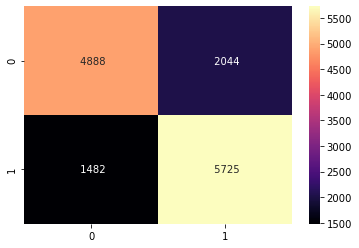

In [78]:
sns.heatmap(svck_confusion_matrix, annot = True, fmt = ' ', cmap = 'magma')

## Naive - Bayes Classification Modelling

In [79]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train, y_train)

gb_y_pred = gb.predict(x_test)

gb_train_acc = accuracy_score(y_train, gb.predict(x_train))
gb_test_acc = accuracy_score(y_test, gb_y_pred)


print(f"Training Accuracy of Naive Bayes Model is {gb_train_acc}")
print(f"Test Accuracy of Naive Bayes SVM Model is {gb_test_acc}")

Training Accuracy of Naive Bayes Model is 0.5379909111806623
Test Accuracy of Naive Bayes SVM Model is 0.5467147605912723


In [80]:
gb_confusion_matrix = confusion_matrix(y_test, gb_y_pred)
print(gb_confusion_matrix)

[[ 681 6251]
 [ 158 7049]]


In [81]:
#displaying the actual and predicted 'Diabetes' values
svmk_results = pd.DataFrame({'Actual (Diabetes)': y_test, 'Predicted (Diabetes)': svck_y_pred})
print(svmk_results)

       Actual (Diabetes)  Predicted (Diabetes)
34746                  0                     1
11085                  0                     0
51382                  1                     0
53894                  1                     1
31333                  0                     1
...                  ...                   ...
58953                  1                     0
5823                   0                     0
57923                  1                     1
15560                  0                     0
49908                  1                     1

[14139 rows x 2 columns]


<AxesSubplot:>

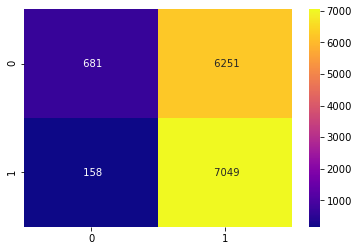

In [87]:
sns.heatmap(gb_confusion_matrix, annot = True, fmt = ' ', cmap = 'plasma')

## Decision Tree Classification Modelling

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(x_train, y_train)


dt_y_pred = dt.predict(x_test)

dt_train_acc = accuracy_score(y_train, dt.predict(x_train))
dt_test_acc = accuracy_score(y_test, dt_y_pred)


print(f"Training Accuracy of Decision Tree Model is {dt_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dt_test_acc}")

Training Accuracy of Decision Tree Model is 0.8690608809435397
Test Accuracy of Decision Tree Model is 0.6762854515878067


In [89]:
dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
print(dt_confusion_matrix)

[[4950 1982]
 [2595 4612]]


In [90]:
#displaying the actual and predicted 'Diabetes' values
dt_results = pd.DataFrame({'Actual (Diabetes)': y_test, 'Predicted (Diabetes)': dt_y_pred})
print(dt_results)

       Actual (Diabetes)  Predicted (Diabetes)
34746                  0                     1
11085                  0                     0
51382                  1                     0
53894                  1                     1
31333                  0                     1
...                  ...                   ...
58953                  1                     0
5823                   0                     0
57923                  1                     0
15560                  0                     0
49908                  1                     1

[14139 rows x 2 columns]


<AxesSubplot:>

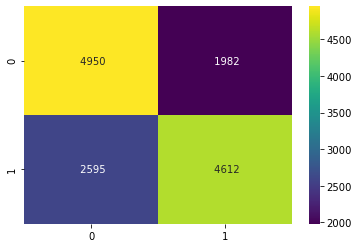

In [92]:
sns.heatmap(dt_confusion_matrix, annot = True, fmt = ' ', cmap = 'viridis')

## Random Classification Modelling

In [93]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rc.fit(x_train, y_train)

rc_y_pred = dt.predict(x_test)

rc_train_acc = accuracy_score(y_train, rc.predict(x_train))
rc_test_acc = accuracy_score(y_test, rc_y_pred)


print(f"Training Accuracy of Random Classification Model is {rc_train_acc}")
print(f"Test Accuracy of Random Classification Model is {rc_test_acc}")

Training Accuracy of Random Classification Model is 0.8628543136526798
Test Accuracy of Random Classification Model is 0.6762854515878067


In [94]:
dt_confusion_matrix = confusion_matrix(y_test, rc_y_pred)
print(dt_confusion_matrix)

[[4950 1982]
 [2595 4612]]


In [95]:
#displaying the actual and predicted 'Diabetes' values
rc_results = pd.DataFrame({'Actual (Diabetes)': y_test, 'Predicted (Diabetes)': rc_y_pred})
print(rc_results)

       Actual (Diabetes)  Predicted (Diabetes)
34746                  0                     1
11085                  0                     0
51382                  1                     0
53894                  1                     1
31333                  0                     1
...                  ...                   ...
58953                  1                     0
5823                   0                     0
57923                  1                     0
15560                  0                     0
49908                  1                     1

[14139 rows x 2 columns]


<AxesSubplot:>

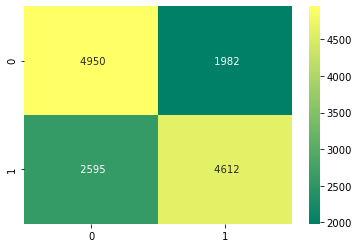

In [97]:
sns.heatmap(dt_confusion_matrix, annot = True, fmt = ' ', cmap = 'summer')